In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-data-set-20022022/NFLX.csv


# Netflix stock prediction for closing price by machine learning algorithms

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/netflix-stock-price-data-set-20022022/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


Text(0, 0.5, 'close price USD($)')

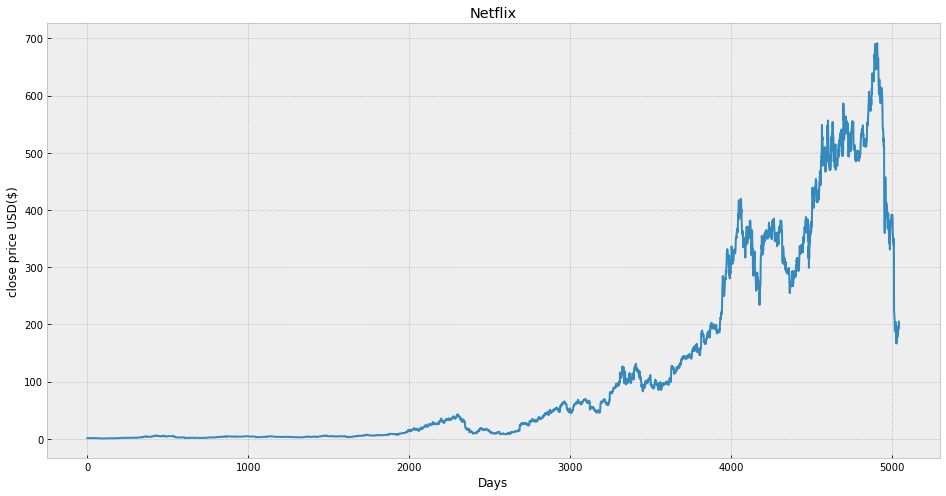

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('close price USD($)')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


# create a variable to predict 'x' days out into the future

In [8]:
df1=df.drop(['Open','High','Low','Adj Close','Volume','Date'],axis=1)
df1.head()

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5044 non-null   float64
dtypes: float64(1)
memory usage: 39.5 KB


In [10]:
future_days=100

# create a new column (target) shifted 'x' days up

In [11]:
df1['prediction']=df1[['Close']].shift(-future_days)
df1.head()

,Close,prediction
0,1.196429,0.550000
1,1.210000,0.459286
2,1.157143,0.550000
3,1.103571,0.682857
4,1.071429,0.636429


In [12]:
df1.tail()

,Close,prediction
5039,195.190002,NaN
5040,197.440002,NaN
5041,192.910004,NaN
5042,205.089996,NaN
5043,198.979996,NaN


# create the feature (x) and convert it to numpy array and remove the last 'x' days

In [13]:
X=np.array(df1.drop(['prediction'],1))[:-future_days]
print(X)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [553.289978]
 [541.059998]
 [539.849976]]


In [14]:
X.shape

(4944, 1)

# create the target data (y) and convert it to a numpy array and get all of the target values except the last 'x' days

In [15]:
y=np.array(df1['prediction'])[:-future_days]
print(y)

[  0.55       0.459286   0.55     ... 192.910004 205.089996 198.979996]


In [16]:
y.shape

(4944,)

# split the data into train and test

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=101)

In [18]:
X_train.shape

(3708, 1)

In [19]:
X_test.shape

(1236, 1)

# create decision tree regressor model

In [20]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

# create linear regression model

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# get the last 'x' days of the feature data

In [22]:
x_future=df1.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)

# show the model tree prediction

In [23]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)

[540.840027  537.219971  519.200012  528.9850155 586.340027  515.859985
 508.25      397.5       387.149994  366.420013  359.700012  386.700012
 384.359985  384.359985  457.130005  429.480011  405.600006  410.170013
 402.100006  499.890015  412.890015  406.269989  391.309998  396.570007
 187.639999  398.079987  386.670013  391.290009  377.380005  367.459991
 183.479996  187.830002  394.519989  386.23999   368.070007  368.070007
 361.730011  350.26001   341.76001   358.790009  356.769989  340.320007
 331.01001   343.75      357.529999  371.399994  374.48999   374.589996
 382.920013  374.48999   375.709991  350.429993  378.51001   391.820007
 381.470001  380.149994  373.470001  391.5       380.149994  368.350006
 362.149994  355.880005  348.        344.100006  350.429993  341.130005
 337.859985  357.529999  226.190002  371.399994  215.520004  209.910004
 198.399994  188.539993  199.520004  183.479996  199.460007  199.869995
 204.009995  188.320007  177.660004  173.100006  177.660004  166

# show the model linear prediction

In [24]:
linear_prediction=lr.predict(x_future)
print(linear_prediction)

[528.42860175 531.43793548 537.561072   537.63697596 532.10247208
 534.51372837 542.86774816 549.75983338 552.61730032 564.84456888
 570.99615562 572.87585156 588.23587043 587.60928581 579.53054844
 580.65074143 571.69864421 560.7529951  565.60401487 569.05005748
 571.75560161 558.54105934 556.36713347 572.98976542 575.46748183
 574.64157668 574.87890711 566.53433212 580.97353645 591.68191304
 594.34950424 585.04610576 614.91178812 618.98435744 612.10177493
 612.87072268 607.53553933 605.54198649 610.1177248  613.95296368
 608.72219149 617.91161914 618.88944805 605.73186318 632.33181804
 643.36298965 649.89426996 646.91344436 641.59720757 652.16316312
 667.59914386 658.92232906 655.64715771 665.68149499 646.79952955
 625.26886251 630.70851492 635.01841466 626.39855726 636.52786184
 660.28935424 657.17560936 664.83664233 668.90921164 659.72928765
 656.67244131 638.06575829 633.18623133 637.20184324 644.17939304
 642.47062533 621.64250383 598.73536681 597.50120205 583.88796079
 593.91279

# visualize the data

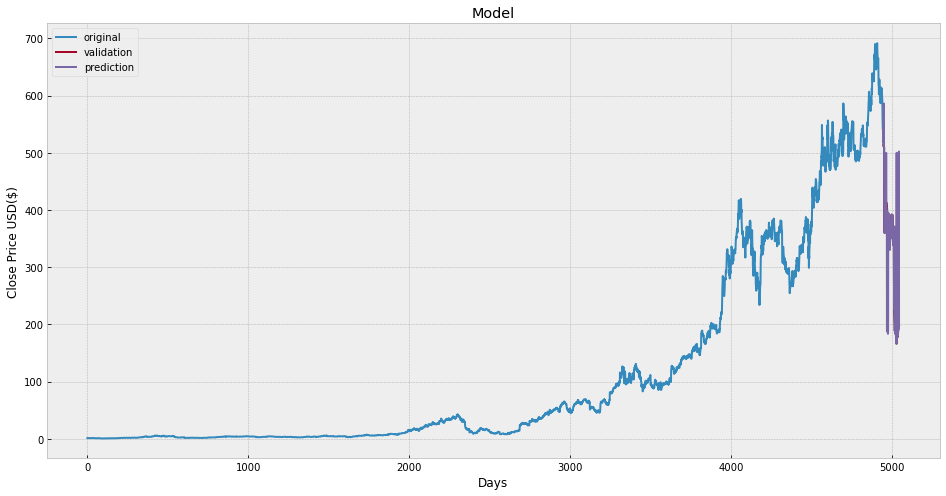

In [25]:
predictions=tree_prediction
valid=df1[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df1['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','validation','prediction'])
plt.show()

# as we see the validation and the prediction are the same 

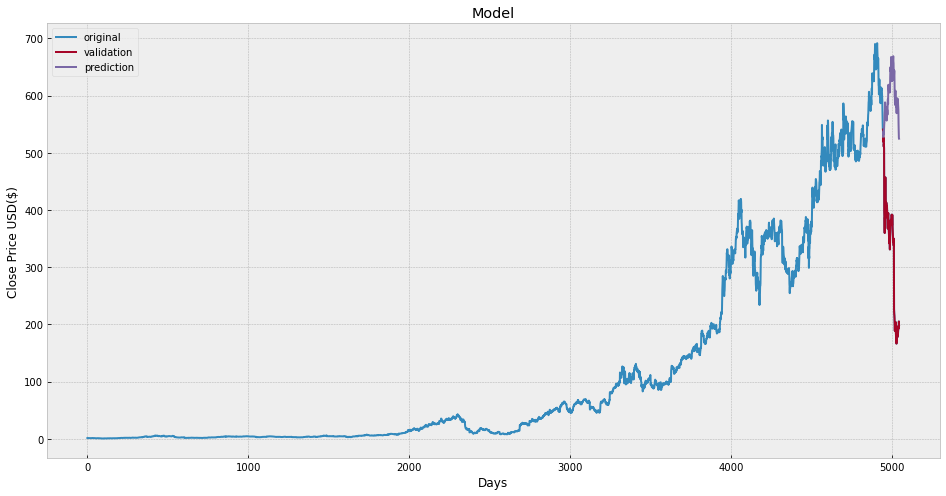

In [26]:
predictions=linear_prediction
valid=df1[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df1['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','validation','prediction'])
plt.show()

# the prediction score are not good

# so we will use the decision tree regressor